In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv(r"C:\Users\vande\becode\immo-eliza-cats-analysis\Nancy\cleaning.csv")

df.head()


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [3]:
#Showing the total number of rows and columns
df.shape
num_rows, num_columns = df.shape

print("Number of observations:", num_rows)
print("Number of features/columns:", num_columns)



Number of observations: 75511
Number of features/columns: 30


In [4]:
#count missing values per column
df.isna().sum()

id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                0
province                              0
locality                              0
zip_code                              0
latitude                          14098
longitude                         14098
construction_year                 33391
total_area_sqm                     7615
surface_land_sqm                  36256
nbr_frontages                     26346
nbr_bedrooms                          0
equipped_kitchen                      0
fl_furnished                          0
fl_open_fire                          0
fl_terrace                            0
terrace_sqm                       13140
fl_garden                             0
garden_sqm                         2939
fl_swimming_pool                      0
fl_floodzone                          0
state_building                        0


In [5]:
#The proportion in % of the missing values 
missing_proportion = df.isna().mean() * 100
missing_proportion

id                                 0.000000
price                              0.000000
property_type                      0.000000
subproperty_type                   0.000000
region                             0.000000
province                           0.000000
locality                           0.000000
zip_code                           0.000000
latitude                          18.670128
longitude                         18.670128
construction_year                 44.220047
total_area_sqm                    10.084623
surface_land_sqm                  48.014197
nbr_frontages                     34.890281
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_furnished                       0.000000
fl_open_fire                       0.000000
fl_terrace                         0.000000
terrace_sqm                       17.401438
fl_garden                          0.000000
garden_sqm                         3.892148
fl_swimming_pool                

In [6]:
#From highest to lowest
missing_proportion.sort_values(ascending=False).to_frame("percent_missing")

,percent_missing
cadastral_income,59.550264
surface_land_sqm,48.014197
construction_year,44.220047
primary_energy_consumption_sqm,35.182953
nbr_frontages,34.890281
longitude,18.670128
latitude,18.670128
terrace_sqm,17.401438
total_area_sqm,10.084623
garden_sqm,3.892148


In [7]:
# Automatically detect numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['id',
 'price',
 'zip_code',
 'latitude',
 'longitude',
 'construction_year',
 'total_area_sqm',
 'surface_land_sqm',
 'nbr_frontages',
 'nbr_bedrooms',
 'fl_furnished',
 'fl_open_fire',
 'fl_terrace',
 'terrace_sqm',
 'fl_garden',
 'garden_sqm',
 'fl_swimming_pool',
 'fl_floodzone',
 'primary_energy_consumption_sqm',
 'fl_double_glazing',
 'cadastral_income']

In [8]:
#Descriptive statistics
numeric_summary = pd.DataFrame({
    "mean": df[numeric_cols].mean(),
    "median": df[numeric_cols].median(),
    "std": df[numeric_cols].std(),
    "min": df[numeric_cols].min(),
    "max": df[numeric_cols].max()
})

numeric_summary


,mean,median,std,min,max
id,3.973235e+07,3.972200e+07,2.290417e+07,0.00000,7.948500e+07
price,4.227709e+05,3.290000e+05,4.383586e+05,76000.00000,2.250000e+07
zip_code,5.144609e+03,4.683000e+03,3.005490e+03,1000.00000,9.992000e+03
latitude,5.088662e+01,5.090092e+01,3.497273e-01,25.76168,5.243424e+01
longitude,4.328660e+00,4.376713e+00,9.509021e-01,-80.19179,6.385048e+00
construction_year,1.984406e+03,1.994000e+03,4.152885e+01,1753.00000,2.024000e+03
total_area_sqm,1.636707e+02,1.270000e+02,4.158511e+02,3.00000,8.814000e+04
surface_land_sqm,1.157088e+03,3.620000e+02,1.011734e+04,0.00000,9.507740e+05
nbr_frontages,2.802929e+00,3.000000e+00,8.891628e-01,1.00000,4.700000e+01
nbr_bedrooms,2.787276e+00,3.000000e+00,1.894188e+00,0.00000,2.000000e+02


In [9]:
#Adding skewness and kurtosis
numeric_summary["skewness"] = df[numeric_cols].apply(lambda x: skew(x.dropna()))
numeric_summary["kurtosis"] = df[numeric_cols].apply(lambda x: kurtosis(x.dropna()))

numeric_summary


,mean,median,std,min,max,skewness,kurtosis
id,3.973235e+07,3.972200e+07,2.290417e+07,0.00000,7.948500e+07,0.001885,-1.197676
price,4.227709e+05,3.290000e+05,4.383586e+05,76000.00000,2.250000e+07,9.449425,201.923234
zip_code,5.144609e+03,4.683000e+03,3.005490e+03,1000.00000,9.992000e+03,0.088328,-1.540659
latitude,5.088662e+01,5.090092e+01,3.497273e-01,25.76168,5.243424e+01,-12.881054,867.955361
longitude,4.328660e+00,4.376713e+00,9.509021e-01,-80.19179,6.385048e+00,-22.917921,2031.074147
construction_year,1.984406e+03,1.994000e+03,4.152885e+01,1753.00000,2.024000e+03,-1.192128,1.539147
total_area_sqm,1.636707e+02,1.270000e+02,4.158511e+02,3.00000,8.814000e+04,146.958036,29735.178273
surface_land_sqm,1.157088e+03,3.620000e+02,1.011734e+04,0.00000,9.507740e+05,68.582841,5930.190533
nbr_frontages,2.802929e+00,3.000000e+00,8.891628e-01,1.00000,4.700000e+01,3.155100,127.425348
nbr_bedrooms,2.787276e+00,3.000000e+00,1.894188e+00,0.00000,2.000000e+02,22.586972,1787.930890


In [10]:
#looking for highly skewed variables
numeric_summary["skewness"].sort_values(ascending=False)


cadastral_income                  160.923272
total_area_sqm                    146.958036
primary_energy_consumption_sqm    126.409987
surface_land_sqm                   68.582841
garden_sqm                         55.556386
terrace_sqm                        48.555432
nbr_bedrooms                       22.586972
price                               9.449425
fl_swimming_pool                    7.108797
fl_furnished                        7.087552
nbr_frontages                       3.155100
fl_open_fire                        1.757894
fl_garden                           1.363959
zip_code                            0.088328
id                                  0.001885
fl_floodzone                       -0.175990
fl_terrace                         -0.369458
fl_double_glazing                  -0.755859
construction_year                  -1.192128
latitude                          -12.881054
longitude                         -22.917921
Name: skewness, dtype: float64

In [11]:
#checking potential outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} potential outliers")


id: 0 potential outliers
price: 5800 potential outliers
zip_code: 0 potential outliers
latitude: 1302 potential outliers
longitude: 2 potential outliers
construction_year: 711 potential outliers
total_area_sqm: 3995 potential outliers
surface_land_sqm: 3534 potential outliers
nbr_frontages: 17 potential outliers
nbr_bedrooms: 8376 potential outliers
fl_furnished: 1419 potential outliers
fl_open_fire: 12830 potential outliers
fl_terrace: 0 potential outliers
terrace_sqm: 4423 potential outliers
fl_garden: 16483 potential outliers
garden_sqm: 13544 potential outliers
fl_swimming_pool: 1411 potential outliers
fl_floodzone: 0 potential outliers
primary_energy_consumption_sqm: 1661 potential outliers
fl_double_glazing: 0 potential outliers
cadastral_income: 2230 potential outliers


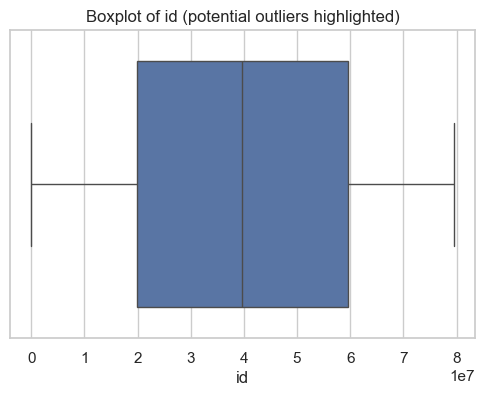

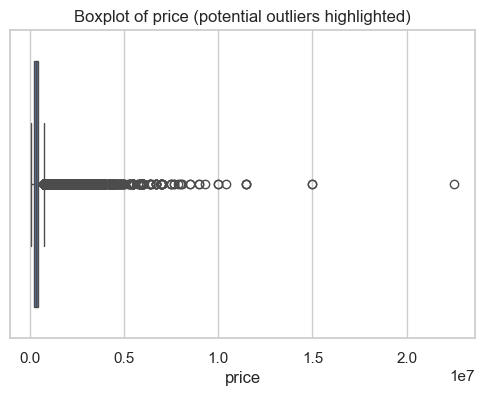

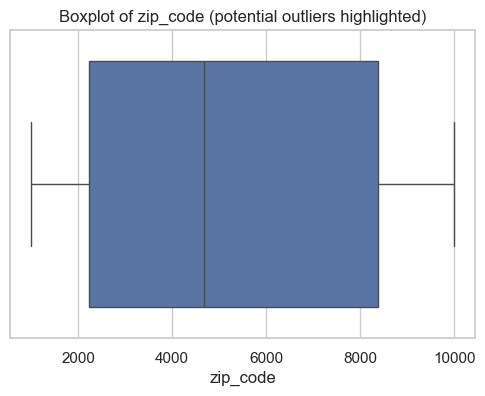

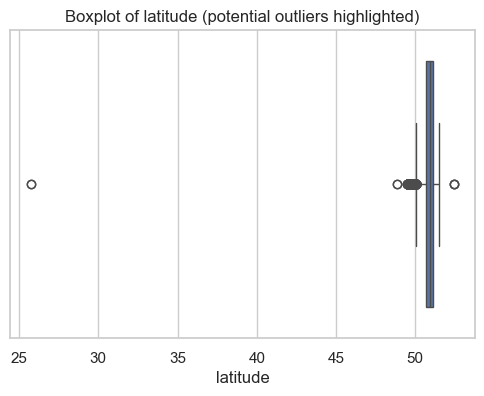

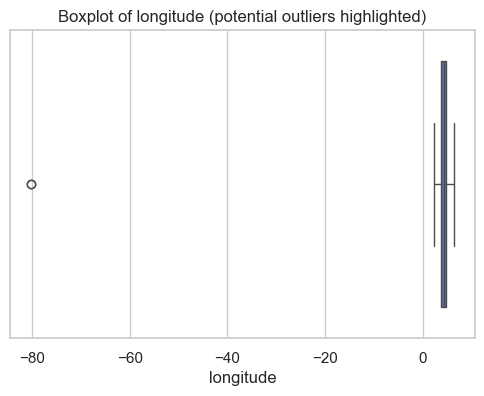

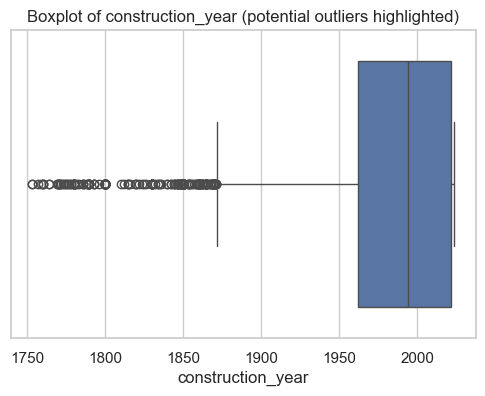

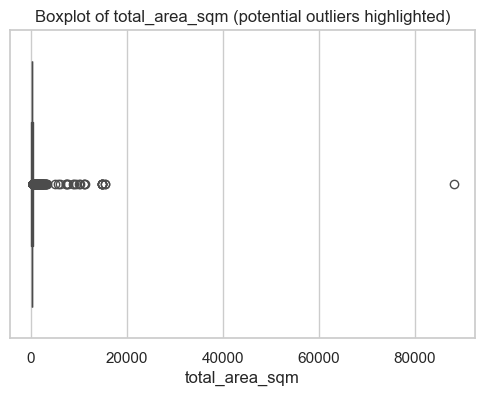

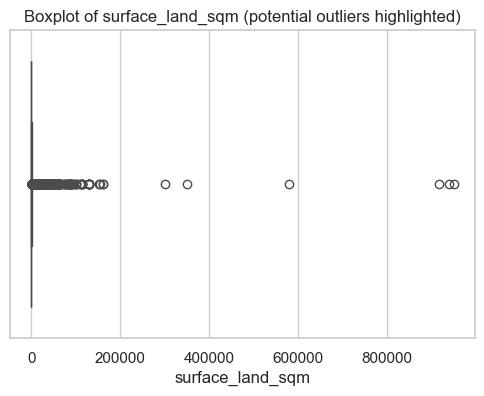

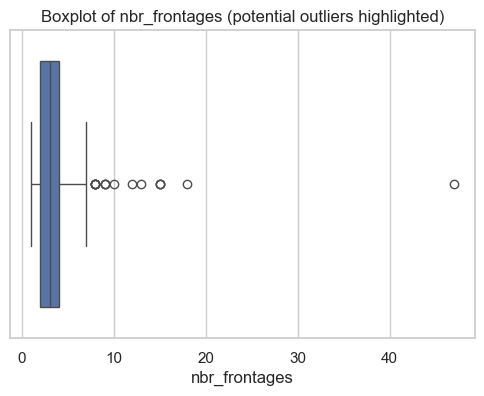

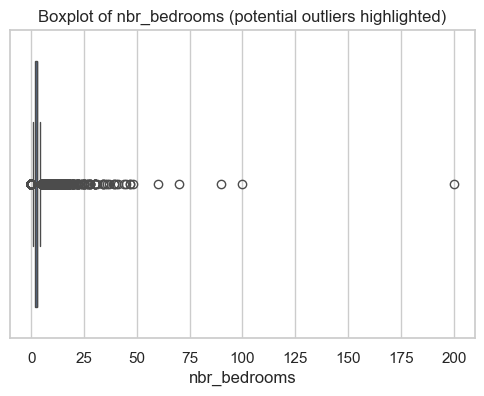

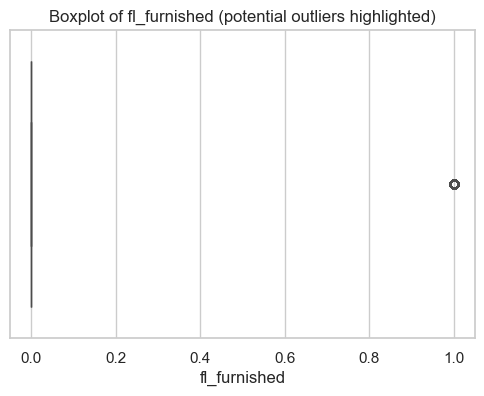

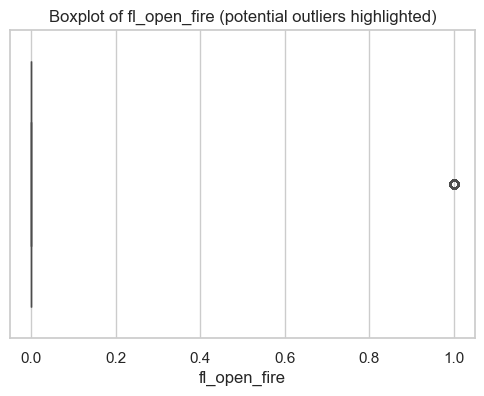

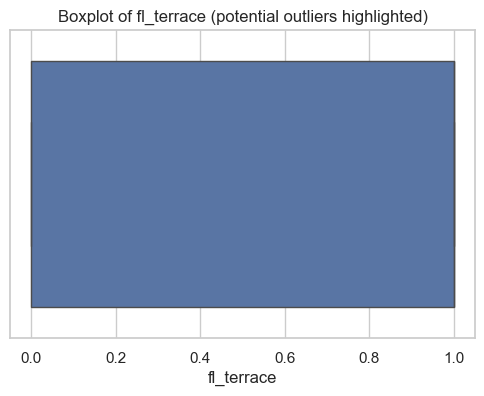

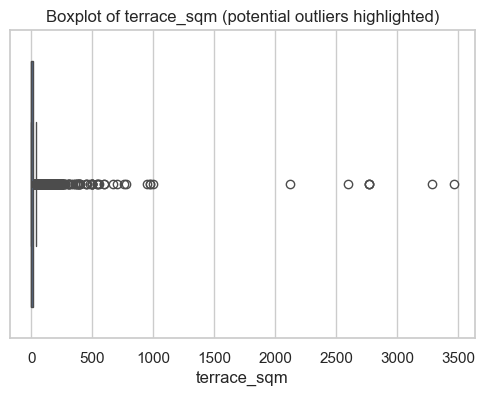

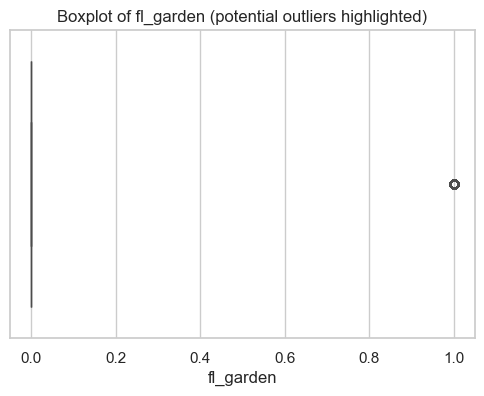

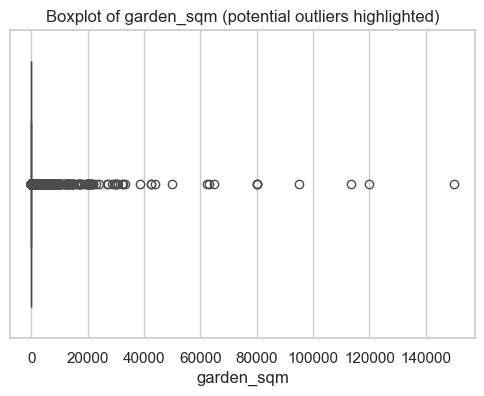

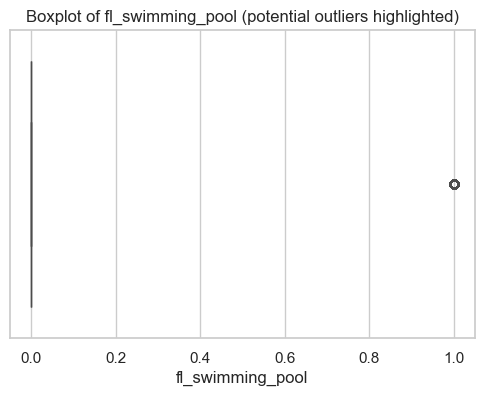

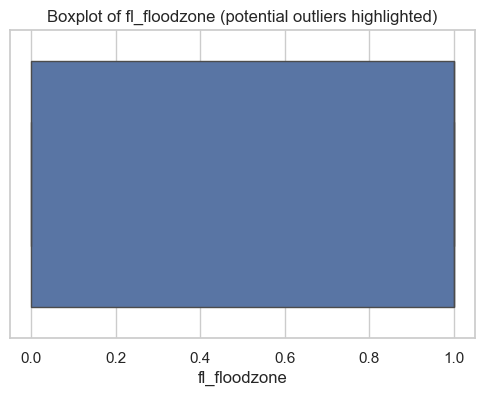

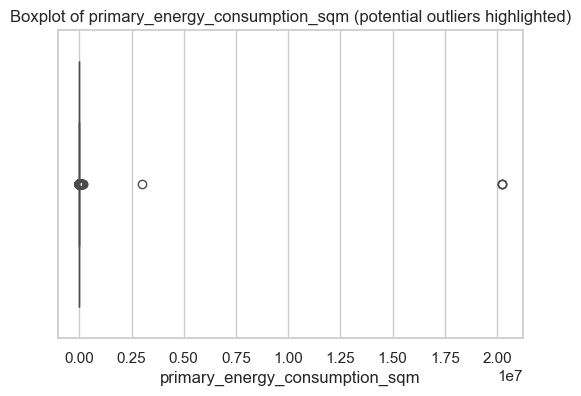

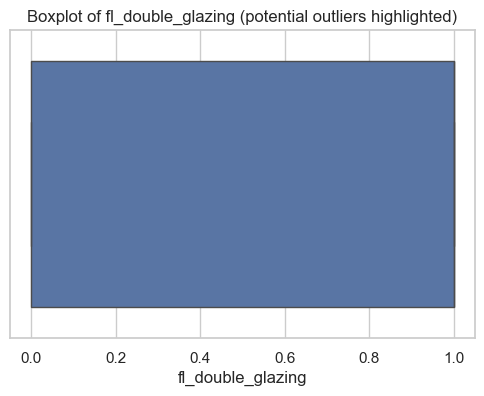

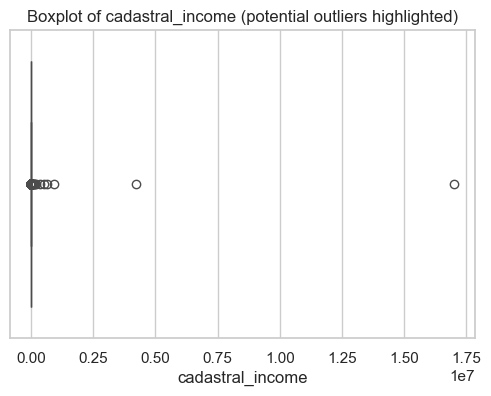

In [12]:
# Plot boxplots for all numeric columns from potential outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (potential outliers highlighted)")
    plt.xlabel(col)
    plt.show()

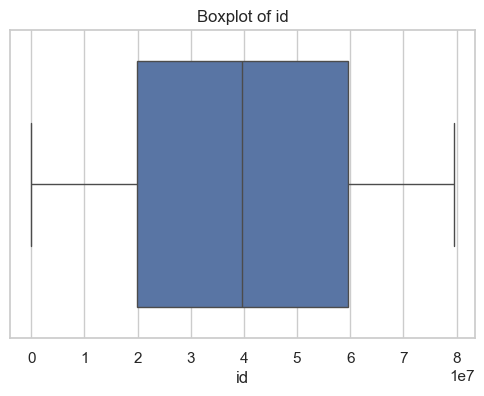

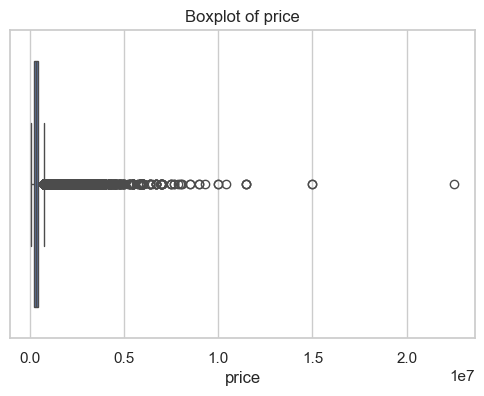

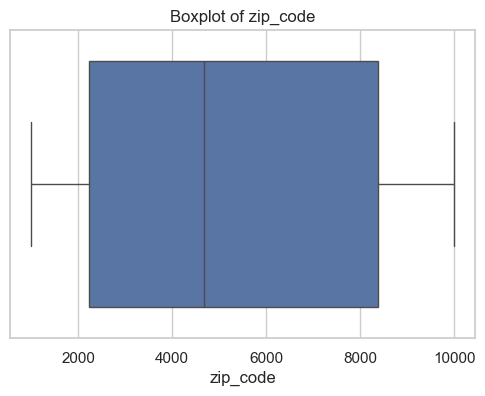

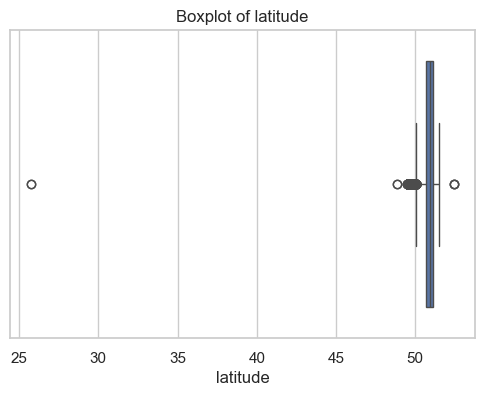

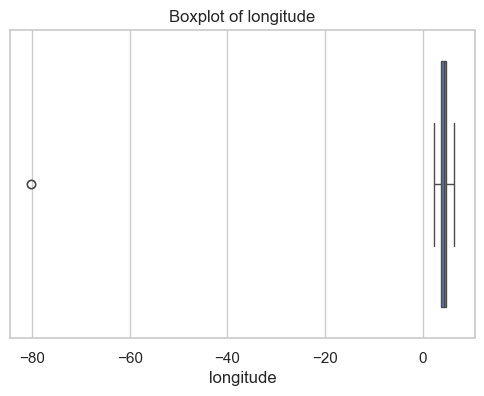

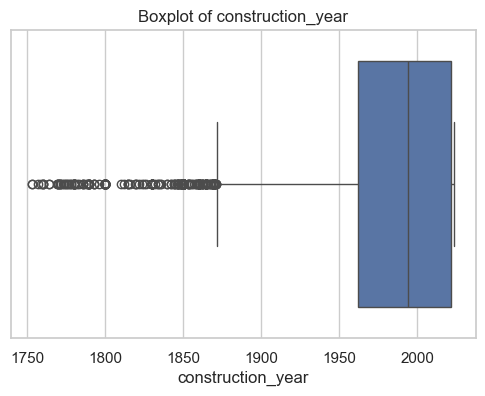

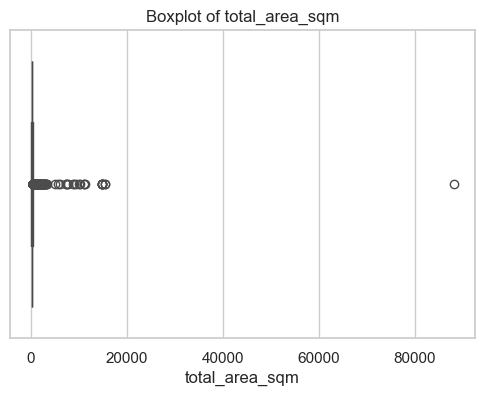

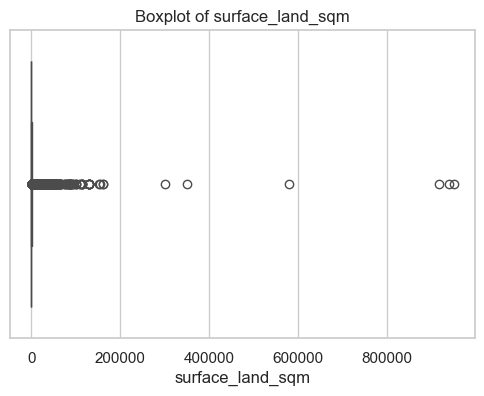

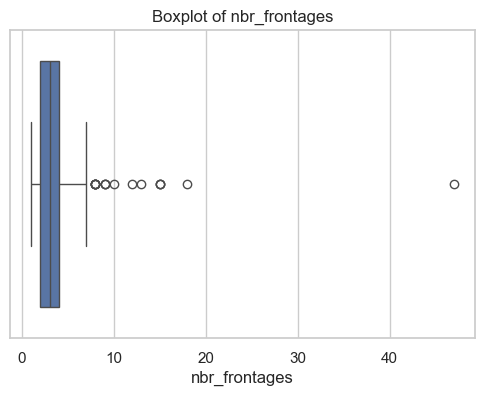

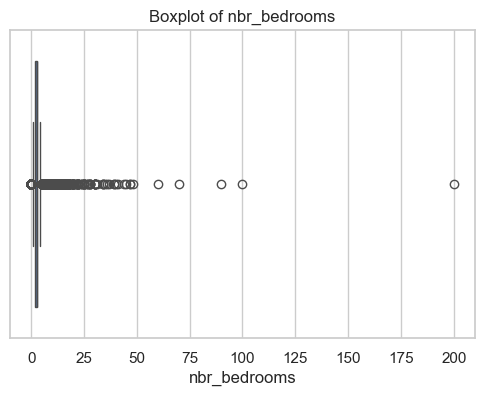

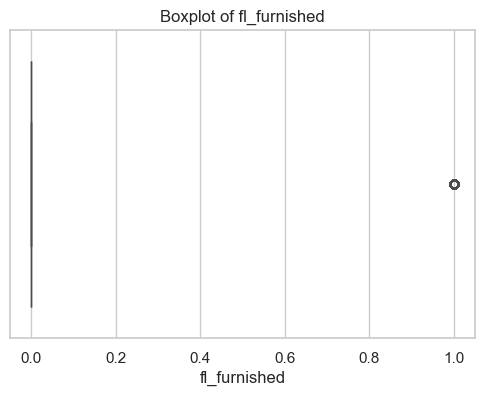

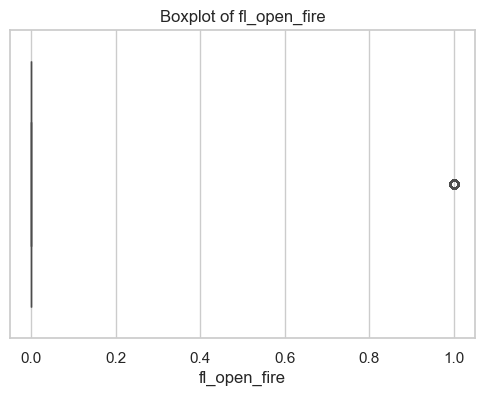

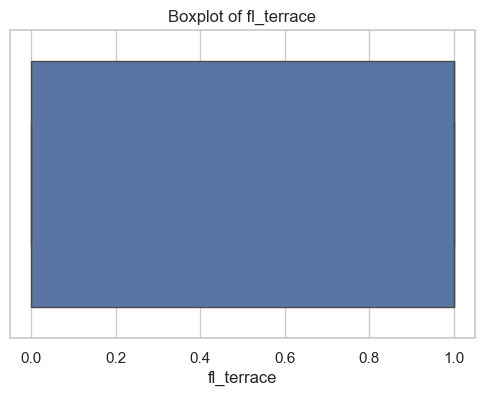

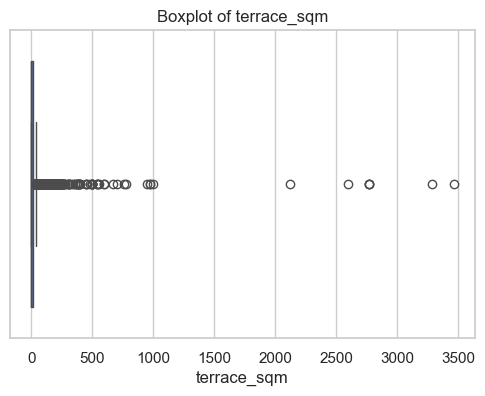

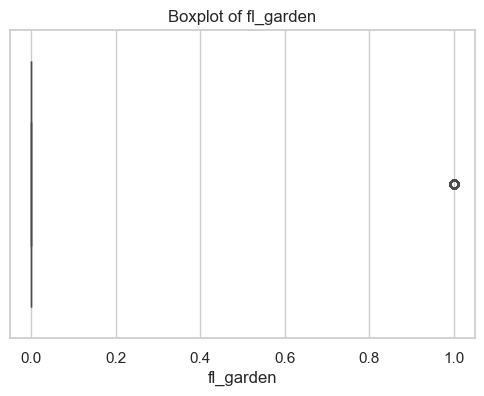

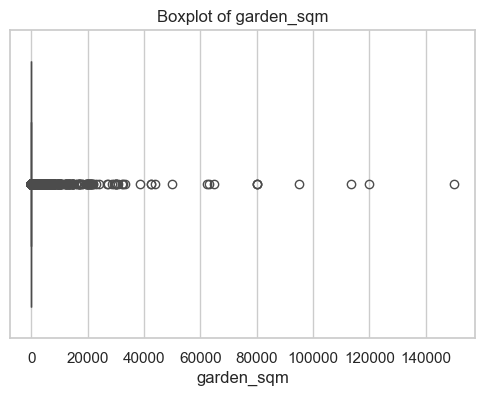

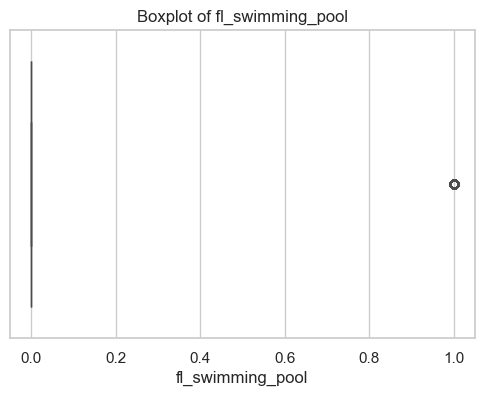

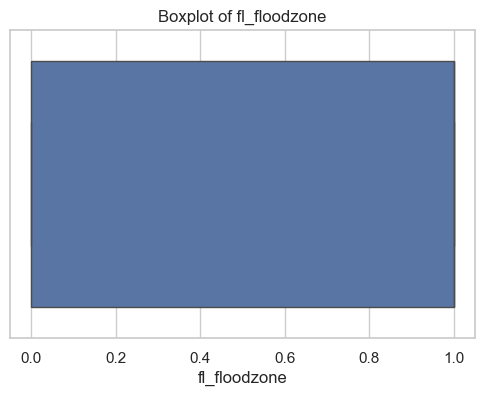

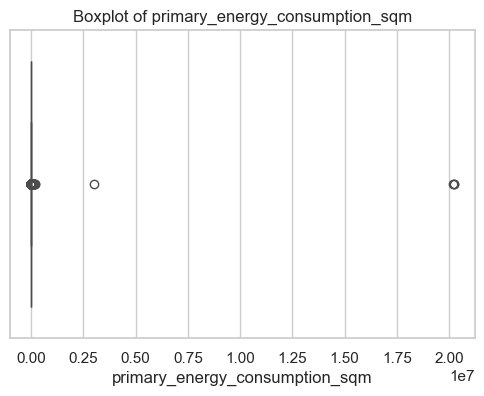

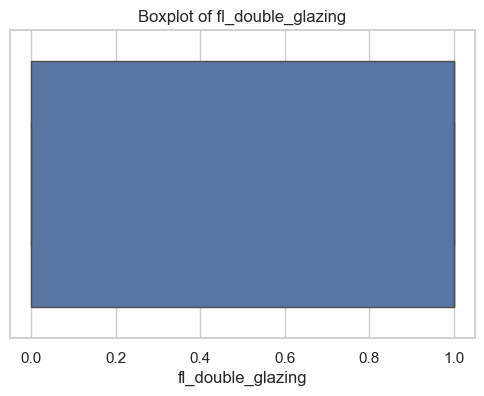

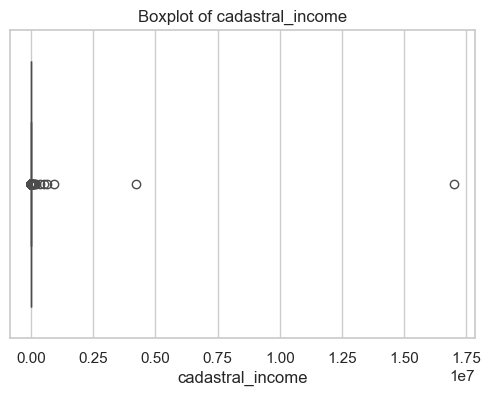

In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Top 5 most skewed numeric variables: ['cadastral_income', 'total_area_sqm', 'primary_energy_consumption_sqm', 'surface_land_sqm', 'garden_sqm']


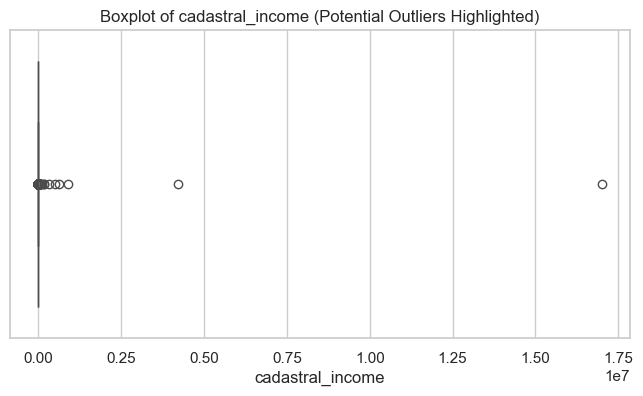

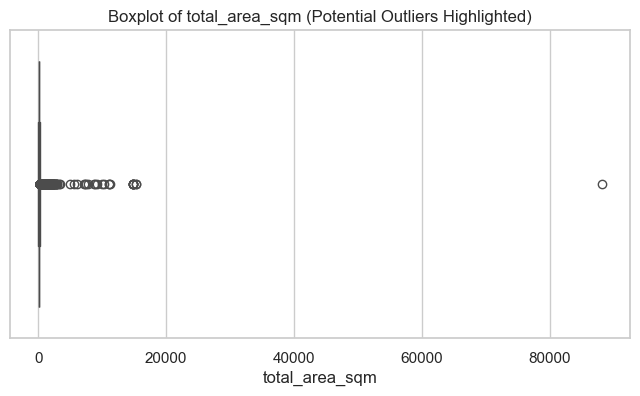

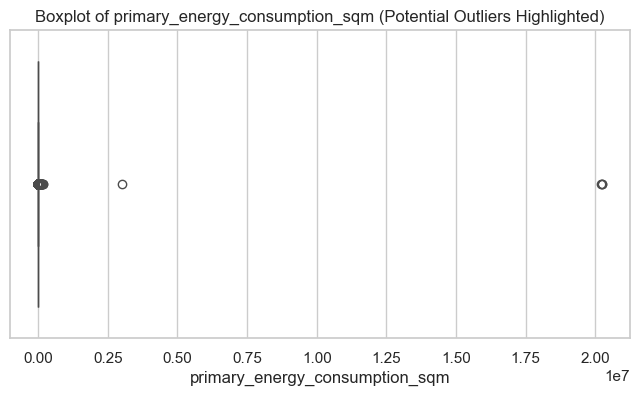

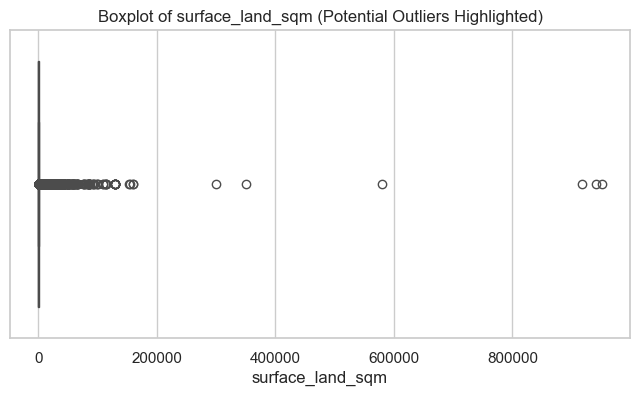

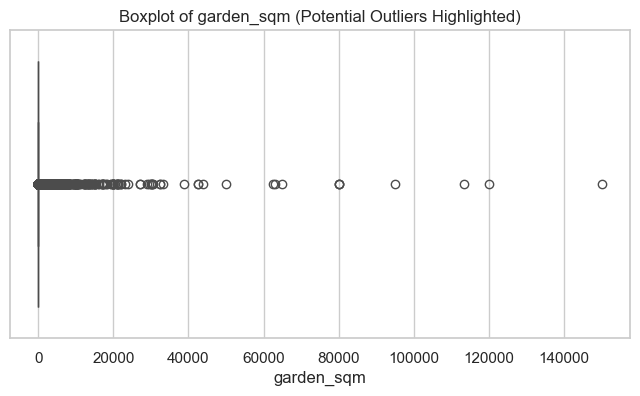

In [14]:
#top 5 potential outliers
# Step 1: Detect numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Calculate skewness for each numeric column
skew_values = df[numeric_cols].skew().sort_values(ascending=False)

# Step 3: Take top 5 most skewed numeric columns
top_skewed = skew_values.head(5).index.tolist()
print("Top 5 most skewed numeric variables:", top_skewed)

# Step 4: Plot boxplots for each
for col in top_skewed:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Potential Outliers Highlighted)")
    plt.xlabel(col)
    plt.show()


In [15]:
# Path to save the processed dataset
processed_path = r"C:\Users\vande\becode\immo-eliza-cats-analysis\Nancy\Data_quality.csv"

# Save without the index column
df.to_csv(processed_path, index=False)
print("Processed dataset saved successfully!")


Processed dataset saved successfully!
